## Titanic Disaster - EDA and Prediction

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# Load the train and test data sets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Disply the basic information about the data sets
print(train.info())
print("--"*20)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

### Dealing with missing values in Train data set

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


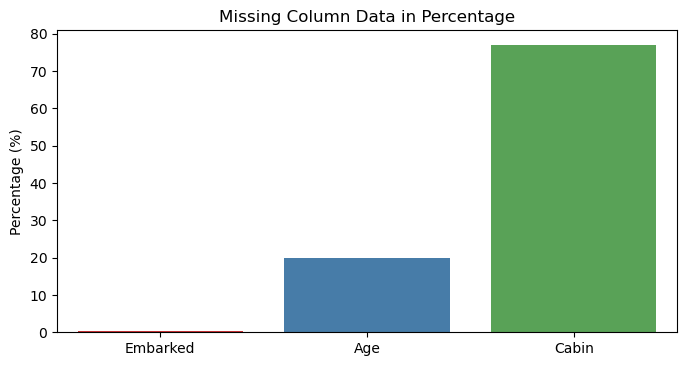

In [6]:
train_percent_missing = (train.isnull().mean() * 100)
train_percent_missing = train_percent_missing[train_percent_missing > 0].sort_values()

plt.figure(figsize=(8,4), dpi=100)
sns.barplot(x=train_percent_missing.index, y=train_percent_missing.values, palette="Set1", dodge=True)
plt.title("Missing Column Data in Percentage")
plt.ylabel("Percentage (%)")
plt.show()

In [7]:
train.loc[train['Embarked'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The "Embarked" column has only two missing values for the train set and then filled with a class with highest frequency with the mode operation.

For this purpose, similar columns such as Pclass and Fare columns are compared.

In [8]:
train_embark_mode = train.loc[(train["Fare"] > 70) & (train["Fare"] < 90) & (train["Pclass"] == 1)]["Embarked"].mode()
train["Embarked"] = train["Embarked"].fillna(train_embark_mode[0])

In [9]:
train.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


In [10]:
# Since the cabin feature column has nearly 80% missing values, it can be dropped.
train = train.drop("Cabin", axis=1)

In [11]:
# Fixing the Age missing data
train["Age"] = train["Age"].interpolate()

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Dealing with missing values in Test data set

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

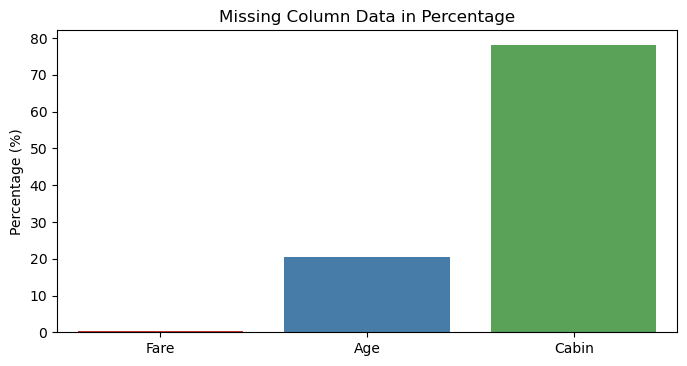

In [15]:
# Finding the percentage of missing column data in the test set
test_percent_missing = (test.isnull().mean() * 100)
test_percent_missing = test_percent_missing[test_percent_missing > 0].sort_values()

plt.figure(figsize=(8,4), dpi=100)
sns.barplot(x=test_percent_missing.index, y=test_percent_missing.values, palette="Set1", dodge=True)
plt.title("Missing Column Data in Percentage")
plt.ylabel("Percentage (%)")
plt.show()

In [16]:
# Dropping the Cabin column as 80% of the values are null
# Null values in the Age column are replaced based on linear interpolation
test = test.drop('Cabin', axis=1)
test['Age'] = test['Age'].interpolate()

In [17]:
test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [18]:
test_fare_mean = test[(test['Embarked'] == 'S') & (test['Pclass'] == 3) & (test['SibSp'] == 0) & (test['Parch'] == 0)]['Fare'].mean()
test['Fare'] = test['Fare'].fillna(np.round(test_fare_mean, 2))

In [19]:
test.iloc[[152]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,9.34,S


In [20]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Visualization

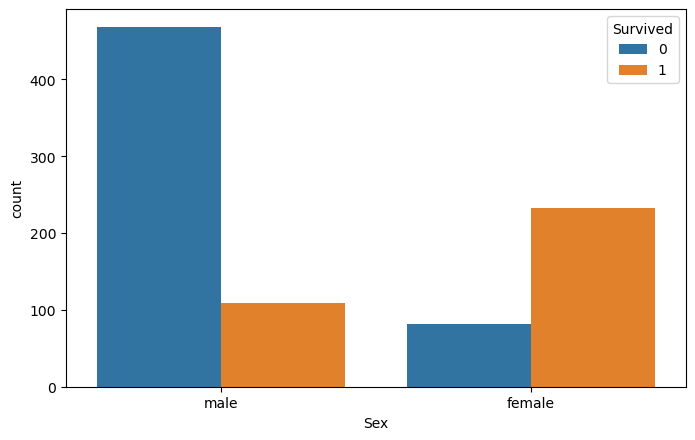

In [21]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=train, x='Sex', hue='Survived');

The above plot reveals that a large number of men did not survive the disaster compared to women.

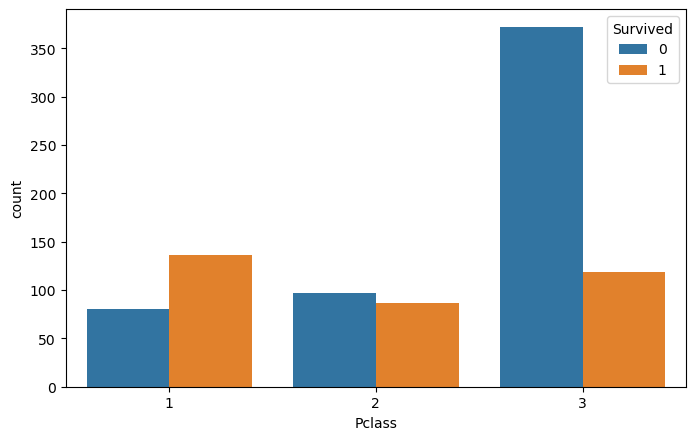

In [22]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=train, x='Pclass', hue='Survived');

It is also interesting to note that more people belonging to Ticket class - 3 died during the disaster.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

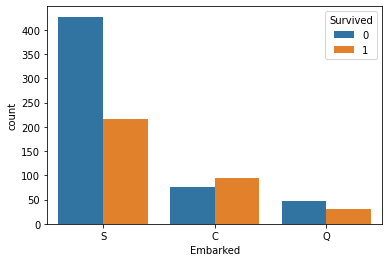

In [23]:
sns.countplot(data=train, x='Embarked', hue='Survived')

People who embarked at Southampton (S) are highly unlikely to survive than those who embarked at Cherbourg (C) and Queenstown (Q). 

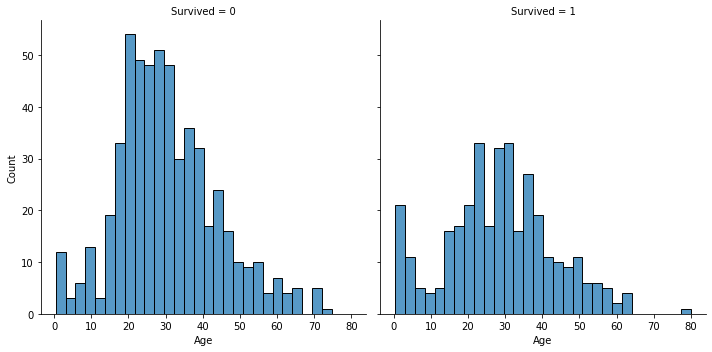

In [24]:
sns.displot(data=train, x="Age", col="Survived", bins=30)

In [25]:
# Summarize the statistics for the numeric columns of the train data set
train.describe().transpose()[1:]

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.726061,13.902353,0.42,21.0000,28.5000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Predictive Modeling

In [26]:
# Dummy variables for class labels
X_train = pd.get_dummies(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1), drop_first=True)
X_test = pd.get_dummies(test.drop(['PassengerId', 'Name', 'Ticket'], axis=1), drop_first=True)

y_train = train['Survived']

### Gradient Boosting Classifier

In [27]:
model = GradientBoostingClassifier(learning_rate=0.05)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

predictions_df = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : predictions})
predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [28]:
output = predictions_df.to_csv("submission_gb.csv", index=False)
predictions_df['Survived'].value_counts()

0    289
1    129
Name: Survived, dtype: int64

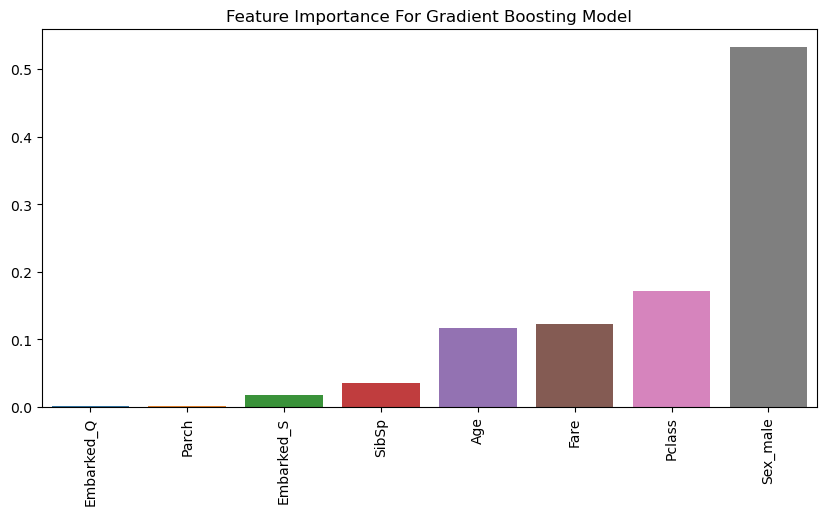

In [29]:
# Feature Importance for Gradient Boosting
feat_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()

#Plotting the feature importance for the gradient boosting
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(x=feat_imp.index, y=feat_imp.values)
plt.title("Feature Importance For Gradient Boosting Model")
plt.xticks(rotation=90);